# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv(r'C:\Users\Sourav Kumar\Desktop\home assisgnment\Linear Regression.csv')

In [3]:
df.head(10)

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Finding Rows & Column
df.shape

(25, 2)

In [5]:
# Checking Null Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

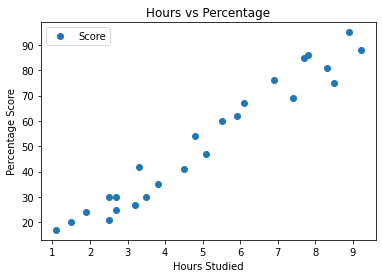

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Score', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Preparing the data**


In [7]:
x=df.drop('Score',axis=1)
y=df['Score']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
regressor = LinearRegression()

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [11]:
print(regressor.fit(x_train,y_train))

print("Training complete")

LinearRegression()
Training complete


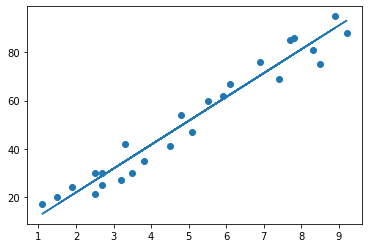

In [12]:
# Plotting the regression Line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Making Predictions¶
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
train_pred =regressor.predict(x_train)

In [14]:
test_pred = regressor.predict(x_test)

In [15]:
# Comparing Actual vs Predicted
df1= pd.DataFrame({"Actual Predict":y_test,"Model predict":test_pred})
df1

,Actual Predict,Model predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [16]:
# You can also test with your own data
hours = np.array([9.25])
hours= hours.reshape(1,-1)
own_pred = regressor.predict(hours)
print("if a student studies for 9.25 hours per day, the predicted value will be",own_pred[0])

if a student studies for 9.25 hours per day, the predicted value will be 93.69173248737538


#### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
print("mean_absolute_error is",metrics.mean_absolute_error(y_test,test_pred))

mean_absolute_error is 4.183859899002975
